In [2]:
import torch
import torchvision
from torchvision import transforms, datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

In [3]:
col_list = ["molecule_name","conformation_name"]
for i in range(1,167):
    col_list.append("f{}".format(i))    
col_list.append("class")
print(col_list)

['molecule_name', 'conformation_name', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/musk_csv.csv', usecols=col_list)
df = df.sample(frac = 1) 

In [9]:
dfs,sample,label = np.split(df,[2,-1], axis=1)
sample_train, sample_test = np.split(sample,[5281], axis = 0)
label_train, label_test = np.split(label,[5281], axis = 0)

In [ ]:
label_train.head(20)

In [36]:
x_train = np.array(sample_train)
x_label = np.array(label_train)
x_test = np.array(sample_test)
x_test_label = np.array(label_test)

In [37]:
x_label = np.asarray(x_label).astype(np.float32)
x_train = np.asarray(x_train).astype(np.float32)
x_test_label = np.asarray(x_test_label).astype(np.float32)
x_test = np.asarray(x_test).astype(np.float32)

In [38]:
x_test

array([[  37., -117., -127., ...,  -46., -178.,  148.],
       [  34.,  -66., -133., ...,  -51., -159.,  130.],
       [  60.,   28.,   45., ...,  -40., -132.,  141.],
       ...,
       [  53.,  -99.,    4., ...,  -44., -116.,  118.],
       [ 223., -198., -112., ...,  -10.,  -97.,  -30.],
       [ 104.,  -80.,  -59., ...,  -42., -128.,  134.]], dtype=float32)

In [29]:
x_train.shape

(5281, 166)

In [30]:
## tthe model
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [69]:
model = keras.Sequential(
    [
        keras.Input(shape=(166)),
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1, activation='sigmoid'),
    ]
)


model.compile(
    loss='binary_crossentropy', # Cross-entropy
                optimizer='rmsprop', # Root Mean Square Propagation
                metrics=['accuracy']
)

In [71]:
history = model.fit(x_train, x_label, batch_size=32, epochs=32, verbose=2,validation_data=(x_test, x_test_label))

Epoch 1/32
166/166 - 0s - loss: 3.2055 - accuracy: 0.8695 - val_loss: 1.3136 - val_accuracy: 0.8808
Epoch 2/32
166/166 - 0s - loss: 0.9672 - accuracy: 0.9208 - val_loss: 0.5716 - val_accuracy: 0.9408
Epoch 3/32
166/166 - 0s - loss: 0.6056 - accuracy: 0.9430 - val_loss: 0.4970 - val_accuracy: 0.9605
Epoch 4/32
166/166 - 0s - loss: 0.4313 - accuracy: 0.9485 - val_loss: 0.2967 - val_accuracy: 0.9620
Epoch 5/32
166/166 - 0s - loss: 0.3436 - accuracy: 0.9544 - val_loss: 0.4303 - val_accuracy: 0.9582
Epoch 6/32
166/166 - 0s - loss: 0.2746 - accuracy: 0.9591 - val_loss: 0.1735 - val_accuracy: 0.9719
Epoch 7/32
166/166 - 0s - loss: 0.2177 - accuracy: 0.9661 - val_loss: 0.1505 - val_accuracy: 0.9704
Epoch 8/32
166/166 - 0s - loss: 0.1909 - accuracy: 0.9678 - val_loss: 0.2691 - val_accuracy: 0.9651
Epoch 9/32
166/166 - 0s - loss: 0.1642 - accuracy: 0.9763 - val_loss: 0.3125 - val_accuracy: 0.9681
Epoch 10/32
166/166 - 0s - loss: 0.1819 - accuracy: 0.9735 - val_loss: 0.2037 - val_accuracy: 0.9749

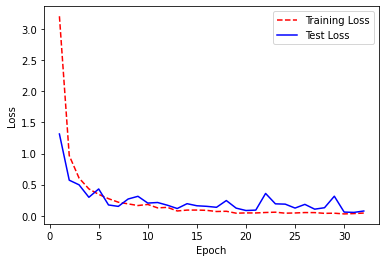

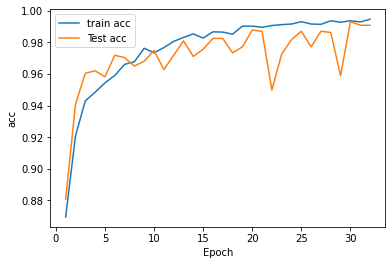

In [72]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();
plt.plot(epoch_count, training_accuracy)
plt.plot(epoch_count, test_accuracy)
plt.legend(['train acc', 'Test acc'])
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.show();